# Geometric Interpretation of Support Vector Machines

By Poojitha Nanduri -pnanduri

This tutorial is about the geometric interpretation of Support Vector Machines. Support Vector Machines are one of the oldest Machine Learning Algorithms, that are very powerful. In this tutorial, we are going to visually understand the importance of SVM decision boundary and derive the objective function for an SVM from the geometric interpretation. 

In this tutorial, we will describe SVM for a binary classification task and derive the objective for the same.

### Topics
Introduction <br>
Hard Margin Classifier<br>
Soft Margin Classifier<br>
Dual Form<br>
Kernel Trick<br>
SKLearn SVM Models<br>
Tuning parameters using Cross Validation Approach<br>
Summary<br>
Citations



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Introduction
Support Vector Machine(SVM) is a <b> supervised machine learning </b> algorithm that is primarily used for classification problems.

It is a <b> discriminative classfier </b>. This means that, unlike generative models where we describe the distribution of each class, we try to differentiate the classes. We find a hyperplane (or line in 2D plane) that seperates or distinguishes the classes.This is called the decision boundary.

This is also called the <b>Widest Street Approach</b> because it finds a linear boundary in such a way that it gives the maximum seperation between the classes. The seperation known as 'margin' is maximised.

In a basic SVM model, for an optimal hyperplane, we assume that the data is <b><i> linearly seperable </i></b>. This means that the data can be seperated linearly by the hyperplane (or line in 2D plane), i.e. they are well seperated.

Let us consider an example to demonstrate this.

Text(0.5,1,'Linearly Seperable Data')

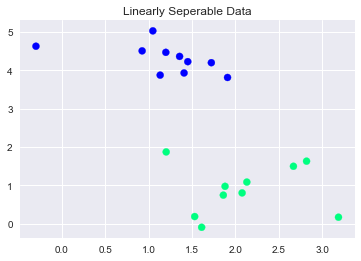

In [126]:
from sklearn.datasets.samples_generator import make_blobs
X_linear, y_linear = make_blobs(n_samples=20, centers=2,
                  random_state=0, cluster_std=0.50)
sns.set()

plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, s=50, cmap = 'winter')
plt.title('Linearly Seperable Data')

In the above dataset, the sample points belong to 2 classes. One is the blue class and the other is the green class.

The above dataset is an example of linearly seperable data. There can be many hyperplanes(or lines) that can be drawn to seperate the two classes. 

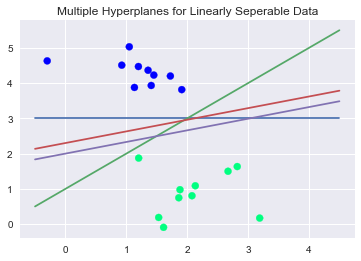

In [127]:
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, s=50, cmap = 'winter')
plt.title('Multiple Hyperplanes for Linearly Seperable Data')
y1 = [3]
x_1 = np.arange(-0.5,5,0.5)
sl_int = [(0,3),(1,1),(0.33,2.3),(0.33,2)]

for m,c in sl_int:
    plt.plot(x_1,m*x_1+c) 



There can be infinite number of hyper planes ( or lines in 2D) that can seperate the two classes. But we choose the hyperplane that maximises the margin. Margin can be defined as the perpendicular distance between the hyperplane and the closest data points. The perpendicular distance between a point and the hyperplane is referred to as the <b> confidence </b>

These close data points are called </b>Support Vectors</b>. They are pivotal elements that control the hyperplane. 

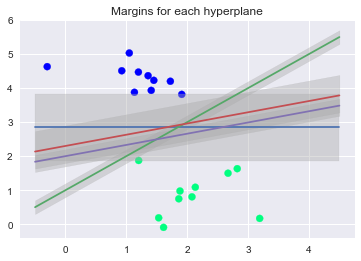

In [128]:
plt.title('Margins for each hyperplane')
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, s=50, cmap = 'winter')
x_1 = np.arange(-0.5,5,0.5)
sl_int = [(0,2.85,0.98),(1,1,0.2),(0.33,2.3,0.6),(0.33,2,0.2)]

for m,c,d in sl_int:
    y_1 = m*x_1+c
    
    plt.plot(x_1,y_1)
    plt.fill_between(x_1, y_1 - d, y_1+ d, edgecolor='none',color='#AAAAAA',alpha = 0.4)

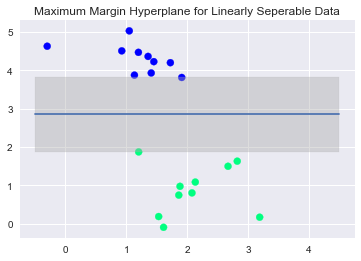

In [129]:
plt.title('Maximum Margin Hyperplane for Linearly Seperable Data')
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, s=50, cmap = 'winter')

m,c,d = (0,2.85,0.98)
y_1 = m*x_1+c
plt.plot(x_1, y_1)
plt.fill_between(x_1, y_1 - d,y_1+ d, edgecolor='none',color='#AAAAAA',alpha = 0.4)

### Hard Margin Classifier

Let us derive the objective function of a Hard Margin Classifier. 

$Let\ \vec{w}\ be\ the\ vector\ representaion\ of\ the\ hyperplane.$
$Therefore,\ \vec{w^T}\ will\ be\ its\ orthogonal\ or\ perpendicular\ vector.$ 

An SVM that doesnot tolerate any misclassification is called a Hard Margin Classfier.

For any point x in the given space, the perpendicular distance between the point and the hyperplane line is given by the dot product of the orthogonal vector and the point.

$$ \vec{w^T}\ = \sum_{i=1}^m \mathbf{w^T_i\mathbf{x}_i}\ $$ 

where m are the number of features in the dataset. 

#### The linear decision rule can be defined as follows:
$$if\ \vec{w^T}\mathbf{x}_i + w_0\ >= 0\ \implies y = +1  $$ 
$$else\ \vec{w^T}\mathbf{x}_i + w_0\ < 0\ \implies y=-1 $$ 

This is the <b>Decision rule for a Hard Classifier</b>.

<hr>

#### Constraints for finding the optimal hyperplane vector:
For a positive sample(+i), $$ \vec{w^T}\mathbf{x_+} + w_0\ > 1 $$
For a negative sample(-i), $$ \vec{w^T}\mathbf{x_-} + w_0\ < -1 $$

These are nothing but the confidence constraints. These constraints are enforcing that the distance between the positive points and the negative points is ample. With these constraints, it is obvious that for support vectors- j, 
$$ \vec{w^T}\mathbf{x_+}_i + w_0\ = 1$$ 

For mathematical convinience, Let y be the class label of a datapoint: '+1' for blue points and '-1' for green points.

The constraints now become, functional margin :
For a positive sample(+i), $$ (\vec{w^T}\mathbf{x_+} + w_0)y_i = 1$$
For a negative sample(-i), $$ (\vec{w^T}\mathbf{x_-} + w_0)y_i = -1$$

For support vectors,
$$ (\vec{w^T}\mathbf{x_i}_i + w_0)y_i = 1$$ 


This represents the amount of <i>confidence</i> that a point belongs to a certain class , rather the confidence of prediction

The planes/lines parallel to the decision boundary/hyperplanes are known as <b>bounding planes</b>.

The total width or the margin of the support vector is the perpendicular distance between these bounding planes. This perpendicular distance can be computed using the dot product of the point along the unit vector along the direction.

$$ Let\ \vec{x_+}\ and\ \vec{x_-}\ be\ support\ vectors\ on\ either\ directions\ of\ the\ decision\ boundary.\ $$

$$ The\ width\ can\ be\ computed\ by\ the\ dot\ product\ across\ the\ unit\ vector\ in\ the\ direction\ which\ is\ given\ by\ \vec{w^T}$$
$$ width\ =(\vec{x_+}-\vec{x_-})*\frac{\vec{w^T}}{|w^T|} $$

From the above constraints,

$$ width\ = \frac{(1-w_0)\ -\ (-1-w_0)}{||w^T||} $$

This means total margin (for a point in positive class and in negative class) is computed by $$  \frac{2}{||\vec{w^T}||}$$

Inorder to maximise the margin given by the above equation, we find the minimum denominator value.

<b>Therefore, This brings us to the objective function of a <b>primal SVM</b> : $$ min \frac{1}{2}{||\vec{w}||} = min\frac{1}{2}||w||^2_2\  (L2\ normalised\ form)\ =\ min \frac{1}{2}(\vec{w^T}.\vec{w}) $$ such that 
the decision rules are satisfied.</b>

This is an optimisation problem with a single local optimum that can be solved by the quadratic programming. It is quadratic programming problem with linear constraints.

Therefore, the linear hyperplane is defined by the support vectors. Other points and any outliers do not affect the linear plane. This makes the model robust to outliers. Also, to predict a label of an unknown point, we just need to know the support vectors. This means that the model stores only the support vector information, making it a sparse model, reducing the storage complexity. 

In the above plot, this is the hyperplane with maximum margin. This is the reason why it is called the<b> Maximum Margin Classfier </b>. It reduces the generalisation error the most. Being a <b>Hard Margin </b> classifier, the data needs to be linearly seperable. This doesnot tolerate any misclassification. But this is not the case in reality. 

Let us explore the other possibilities.

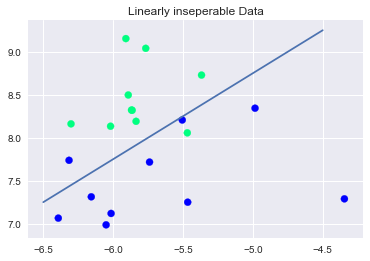

In [130]:
x = [-6.5,-6,-5.5,-5,-4.5]
y= []
for i in x:
    y.append(i+13.75)
X_non_linear, y_non_linear = make_blobs(n_samples=20, centers=2,
                  random_state=5, cluster_std=0.50)
sns.set()
plt.title('Linearly inseperable Data')
plt.plot(x,y)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, s=50, cmap = 'winter')

### Soft Margin Classifier
In the above plot, the data is not linearly seperable. There will be a few points on the wrong side of the line i.e. that are misclassified. In this case, Maximum Margin Classifier i.e. the Hard classifier will not work. In such cases, <b> Soft Margin Classifier</b> is used. 

It works the same as the Hard classifier. It attempts to maximise the margin seperating the classes. But in every case of misclassification , using a <i>regularisation parameter</i>, a penalty is given. The classifier contains a hyperparameter that controls the amount of misclassification/ number of mistakes. This hyperparameter 'C' is tuning parameter that can be best obtained through cross-validation. This is used to minimise the error. 

But not all the mistakes are penalised equally. Each misclassification is penalised independently with the help of slack variables. These slack variables denote the distance of the misclassified point from the respective(actual class) bounding plane. 

The objective function of the classifier is changed to  $$ \ min \frac{1}{2}(\vec{w^T}.\vec{w}) + C.\sum_{i=1}^j\epsilon_j \\ such \ that \ (\vec{w^T}\mathbf{x} + w_0)y_i\ >=\ 1- \epsilon_j \ \forall j\ or\ margin\ >=\ 1- \epsilon_j,\\ \epsilon_j >= 0 \ \forall j $$ 

$$ where\ \epsilon_j\ is\ a\ slack\ variable\ that\ are\ used\ for\ linear\ penalty\ for\ a\ misclassification\ and\ C\ is\ the\ tradeoff\ parameter $$

The slack variables impose a linear penalty that can be thought of as <b> Hinge Loss</b>.
$$ \epsilon_j = (1-(\vec{w^T}\mathbf{x_j}+w_0)y_j)$$

It is important that we find the best optimal 'C' as it is associated with the <b><i> Bias Variance Tradeoff </i></b>. For a small value of C, the misclassification rate is small. This means that it has got low bias associated with it. But this may not generalise well and have high variance. 
When the C value is low, the minimisation objective function is not affected much, and a optimal hyperplane with wider margin is achieved.

For a large value of C, the number of misclassifications allowed are high. This means that the classifier would generalise better , but have high bias. 
When the C value is high, the minimisation objective function is significantly affected. This will lead to a optimal hyperplane with a narrow margin.  

This is the reason why C is called the tradeoff parameter.<b> As C tends to a huge number (infinity), a soft margin classifier almost approaches to become a Hard Classifier.</b>

### Dual Form 
The above objective function can be written in another form called the dual form. Since the math involved in this computation is very complicated, I am not including it in this tutorial. But it can be computed using the objective function of the soft classifier along with the constraints.  In this form, every combination of two data points is taken into consideration. 

The objective function of dual form is as follows:
$$ maximise\ D(\mathbf{\alpha} = \sum_{i=1}^n \alpha_i -\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j(\mathbf{x_i}.\mathbf{x_j}) $$

$$ such \ that \sum_{i=1}^n \alpha_i y_i = 0 \ and \  0<=\alpha_i <=C $$

$$ This\ means\ that\ there\ is\ a\ factor\ \alpha_i\ associated\ with\ each\ data\ point.\ The\ influence\ of\ each\ point\ is\ controlled\ by\ 'C'. $$

$$ \alpha_i\ can\ take\ 3\ values,\ $$
$$ 0 < \alpha_i < C \ for \ a \ support \ vector \ with\ \epsilon_j = 0 $$
$$ \alpha_i = C  \ for \ a \ support \ vector \ with\ \epsilon_j > 0 $$
$$ \alpha_i = 0 \ otherwise $$

This dual form is completely based on the <b>inner product of the data points/ training data </b>. The importance of this property can be explained while using the Kernel Trick.


Text(0.5,1,'Nonlinear Data')

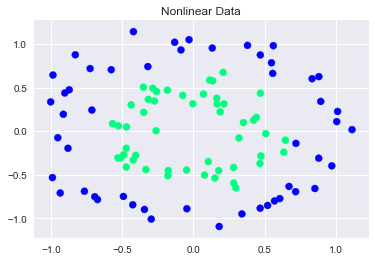

In [131]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=100,factor=0.5,noise = 0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'winter')
plt.title('Nonlinear Data')

### Kernel Trick
For extremely non linear data(for example- swiss roll data or the above dataset), soft margin classifier is also inefficient. The best way to classify such data is by using <b> Kernel Trick</b>.

For this example,There can be no hyperplane that will be sufficiently accurate in case of a soft margin classifier. In such cases, we need to transform these data points into a high dimensional space where they are assumed to become linearly seperable. This is done by <b> Kernel Functions </b>.

The high dimensional space is defined by polynomial functions or Gaussian basis functions, which make the non-linear data into linear data.

Since the dual form depends on the inner product of the data points, we can change this to the new transformed attributes, formed by the Kernel function.

The objective function of dual form changes as follows:
$$ maximise\ D(\mathbf{\alpha} = \sum_{i=1}^n \alpha_i -\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jK(\mathbf{x_i}.\mathbf{x_j}) $$

$$ where K(\mathbf{x_i}.\mathbf{x_j}) = \phi(x_i).\phi(x_j) \ where \ \phi(x)\ is\ a\ point\ in\ high\ dimensional\ space. $$

$$ such \ that \sum_{i=1}^n \alpha_i y_i = 0 \ and \  0<=\alpha_i <=C $$



There are many types of Kernels
$$ 1.\ \ Linear:\ \ K(\mathbf{x_i}.\mathbf{x_j}) = \mathbf{x_i}.\mathbf{x_j} $$
$$ 2.\ \ Polynomial:\ \ K(\mathbf{x_i}.\mathbf{x_j}) = [\mathbf{x_i}.\mathbf{x_j} + 1] $$
$$ 3.\ \ Radial\ Basis\ Functions\ or\ Gaussian:\  \ K(\mathbf{x_i}.\mathbf{x_j}) = exp(-|\mathbf{x_i}-\mathbf{x_j}|^2/\sigma^2) $$
$$ 4.\ \ Sigmoid:\ \ K(\mathbf{x_i}.\mathbf{x_j}) = tanh(\gamma(\mathbf{x_i}-\mathbf{x_j})+c) $$




### SKLearn SVM Models

There are many parameters in the SVM Model of sklearn package. In this tutorial, I will be focusing only on 'C' and the 'kernel' parameters.

To start with, we need to import the model from sklearn. This can be done by:
from sklearn.svm import SVC

We declare the model with the desrired parameters, fit the model on the training set and predict the model on the test set.

Below is an example decribing all these steps

In [133]:
from sklearn.svm import SVC
mod = SVC(kernel = 'linear', C = 100000000000000)
mod.fit(X_linear,y_linear)

SVC(C=100000000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
## This function is used to plot the bounding planes in each case
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### For Linearly Seperable Data

#### Linear Kernel

Text(0.5,1,'Linear Decision Boundary Along with Bounding planes')

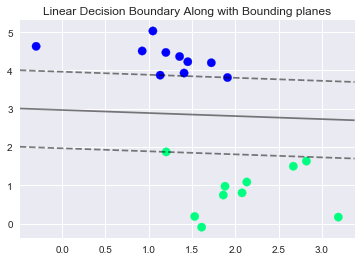

In [134]:
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, s=70, cmap='winter')
plot_svc_decision_function(mod);
plt.title('Linear Decision Boundary Along with Bounding planes')

The points that touch the bounding planes are the <b>Support Vectors </b>. They can be found out in scikit learn using <i>support_vectors_</i> attribute of the model.

For linearly seperable data, it obviously will not matter if it is a soft margin or a hard margin classifier. Therefore, it doesnot matter what the C value is in this case.

In [64]:
mod.support_vectors_

array([[1.13280393, 3.87673946],
       [1.91004907, 3.81514839],
       [1.20213243, 1.87305136]])

#### Polynomial Kernel

Text(0.5,1,'Linear Decision Boundary Along with Bounding planes')

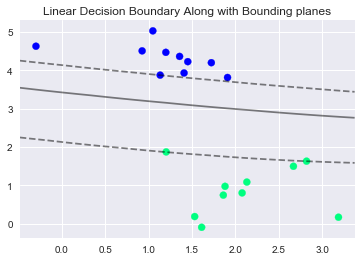

In [135]:
mod = SVC(kernel = 'poly', C=10)
mod.fit(X_linear,y_linear)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, s=50, cmap='winter')
plot_svc_decision_function(mod);
plt.title('Linear Decision Boundary Along with Bounding planes')

#### Radial Basis or Gaussian Kernel

Text(0.5,1,'Non-Linear Decision Boundary Along with Bounding planes')

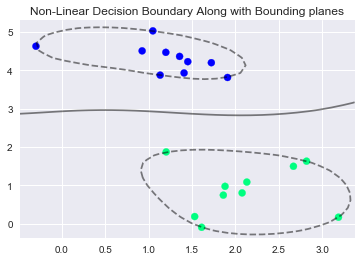

In [136]:
mod = SVC(kernel = 'rbf', C=10)
mod.fit(X_linear,y_linear)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, s=50, cmap='winter')
plot_svc_decision_function(mod);
plt.title('Non-Linear Decision Boundary Along with Bounding planes')

### For slightly Non Linear Data,

In case of non-linear data, linear kernel with large C value (Hard Margin Classifier) will not do a great job of seperating the data. This can be illustrtaed using the following example.

Text(0.5,1,'Hard Margin Classifier for linearly inseperable data')

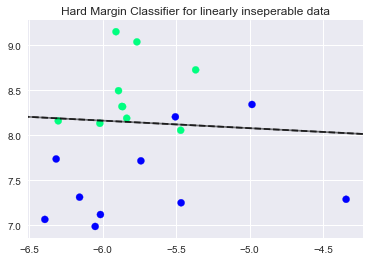

In [137]:
## As mentioned above, large C values make the model a Hard Margin Classifier
mod = SVC(kernel = 'linear', C = 100000000000000)
mod.fit(X_non_linear,y_non_linear)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, s=50, cmap='winter')
plot_svc_decision_function(mod);
plt.title('Hard Margin Classifier for linearly inseperable data')

In the above model, the bounding planes are overlapping on the decion boundary itself. This means that the <b> margin is almost 0 </b>. There is no margin for this model, making it a very inflexible model. For such non linear data, we can use Soft Margin Classifier. This is included in the scikit learn model by low C values.

Text(0.5,1,'Linear Decision Boundary Along with Bounding planes-Soft Margin Classifier')

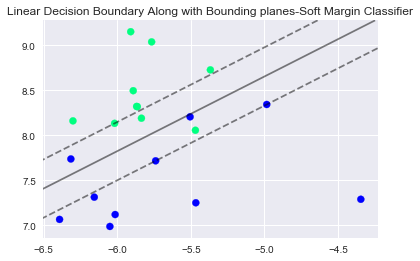

In [138]:
mod = SVC(kernel = 'linear', C = 10)
mod.fit(X_non_linear,y_non_linear)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, s=50, cmap='winter')
plot_svc_decision_function(mod);
plt.title('Linear Decision Boundary Along with Bounding planes-Soft Margin Classifier')

#### Polynomial Kernel

Text(0.5,1,'Non-Linear Decision Boundary Along with Bounding planes')

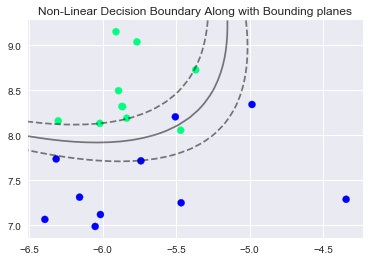

In [139]:
mod = SVC(kernel = 'poly', C = 10)
mod.fit(X_non_linear,y_non_linear)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, s=50, cmap='winter')
plot_svc_decision_function(mod)
plt.title('Non-Linear Decision Boundary Along with Bounding planes')

#### Radial Basis or Gaussian Kernel

Text(0.5,1,'Non-Linear Decision Boundary Along with Bounding planes')

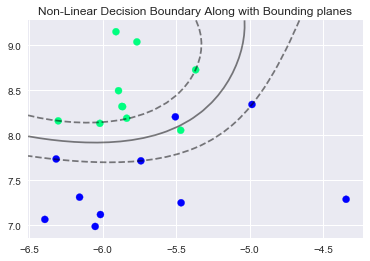

In [140]:
mod = SVC(kernel = 'rbf', C = 10)
mod.fit(X_non_linear,y_non_linear)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, s=50, cmap='winter')
plot_svc_decision_function(mod)
plt.title('Non-Linear Decision Boundary Along with Bounding planes')

In this model, though there are a few misclassifications, there is a good margin between the bounding planes and the decision boundary. But for extremely non-linear data, even a soft margin classifier does not do a great job. This can illustrated using the following example.

### For completely non-linear data,
#### Linear Kernel

Text(0.5,1,'Linear Decision Boundary for non-linear data')

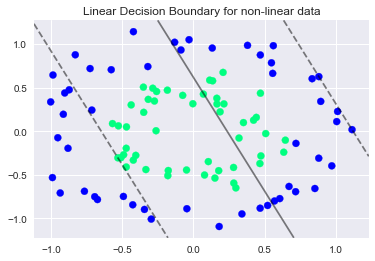

In [141]:
mod = SVC(kernel = 'linear', C = 10)
mod.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(mod);
plt.title('Linear Decision Boundary for non-linear data')

As you can see, there a lot of misclassifications which is not desirable in the given scenario.  In such cases, we use the Kernel Trick to make the data linearly seperable in higher dimensions.

#### Radial Basis / Gaussian Kernel

Text(0.5,1,'Non-Linear Decision Boundary for Non-linear data')

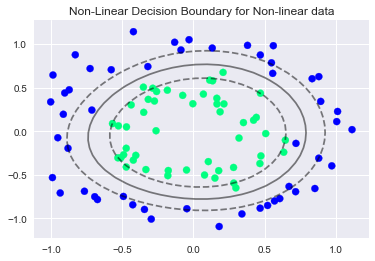

In [142]:
mod = SVC(kernel = 'rbf', C=10)
mod.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(mod);
plt.title('Non-Linear Decision Boundary for Non-linear data')

#### Polynomial Kernel

Text(0.5,1,'Non-Linear Decision Boundary for Non-linear data')

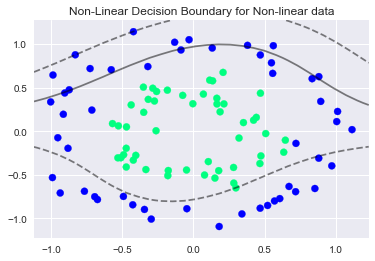

In [143]:
mod = SVC(kernel = 'poly', C=10)
mod.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(mod)
plt.title('Non-Linear Decision Boundary for Non-linear data')

### Tuning parameters using Cross Validation

We can chose the best Kernel and C values using the cross validation technique. In the following example, let us see the cross validation technique.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##list of kernels
kernels =['linear','rbf','poly','sigmoid']
## Hyperparameter values 
C = np.arange(1,10,2)

## Spliting the data into train and test split. This inbuilt function shuffles the data and then splits the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Misclassification rate = 1- accuracy score
scores=[]

for k in kernels:
    for i in C:
        mod = SVC(kernel=k,C=i)
        mod.fit(X_train,y_train)
        ypred = mod.predict(X_test)
        scores.append((k,i,1-accuracy_score(y_test,ypred)))
        
## Setting some arbitrary value to find the minimum error
min_error = 100

for i in scores:
    if(i[2]<min_error):
        min_error = i[2]
        best_comb = i
best_comb

('rbf', 1, 0.030303030303030276)

Therefore, the model with the least misclassification rate is described using a Radial Basis Function Kernel with C=1. Let us plot this model to have a better understanding.

Text(0.5,1,'Non-Linear Decision Boundary for Non-linear data')

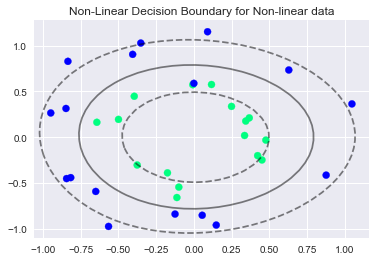

In [144]:
mod = SVC(kernel = 'rbf', C=1)
mod.fit(X_train,y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')
plot_svc_decision_function(mod)
plt.title('Non-Linear Decision Boundary for Non-linear data')

### Summary
As we have seen, SVM is a very powerful machine learning algorithm. In terms of prediction, the model is very fast. This is because the final model depends relatively on a few support vectors. This makes it a sparse model that takes up very little memory.

Since the final model depends only on the support vectors, it is robust to outliers. This property also helps it in working well with the high dimensional data. The Kernel Trick makes this model very flexible and scalable.

But, there are a few minor drawbacks associated with this model. Since the model is highly dependent on the C - tradeoff factor, we need to choose the appropriate value using extensive cross validation approach. Also,This model does not give any direct probabilistic interpretation for the data points. 

Most importantly, from the dual form , it is evident that training this model is dependent on the number of data points (it is taking the combination of every data point). This makes it computationally expensive for a dataset with large number of data points.  


### Citations
1. sklearn official documentation http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
2. Python Data Science Handbook https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
